In [5]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [8]:
(X_train, y_train) , (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 595s 3us/step


(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [18]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [22]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","deer","dog","frog","horse","ship","truck"]

In [24]:
classes[9]

'ship'

In [54]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X_train[9])
    plt.xlabel(classes[y[index]])

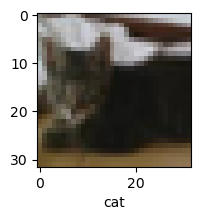

In [56]:
plot_sample(X_train,y_train,9)

In [62]:
X_train  = X_train/255
X_test = X_test/255

In [64]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\Adeel Farooq Khan\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.3022 - loss: 1.9336
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.4202 - loss: 1.6406
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.4536 - loss: 1.5534
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.4717 - loss: 1.4982
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.4952 - loss: 1.4316


In [65]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.51      0.52      1000
           1       0.71      0.43      0.54      1000
           2       0.33      0.42      0.37      1000
           3       0.37      0.29      0.33      1000
           4       0.32      0.57      0.41      1000
           5       0.51      0.24      0.33      1000
           6       0.51      0.52      0.51      1000
           7       0.55      0.52      0.53      1000
           8       0.48      0.72      0.57      1000
           9       0.64      0.43      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.46     10000
weighted avg       0.50      0.46      0.46     10000



In [68]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Adeel Farooq Khan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3742 - loss: 1.7181
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5930 - loss: 1.1557
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6469 - loss: 1.0136
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6789 - loss: 0.9257
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7051 - loss: 0.8512
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7240 - loss: 0.7906
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7411 - loss: 0.7413
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7574 - loss: 0.6981
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7695 - loss: 0.6619
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7864 - loss: 0.6108


In [73]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6945 - loss: 0.9406


[0.9395917057991028, 0.6962000131607056]

In [74]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[7.66445301e-04, 6.30885843e-05, 1.87216210e-03, 8.72085214e-01,
        4.81729367e-04, 1.03333972e-01, 2.06826515e-02, 8.71441589e-05,
        4.91074228e-04, 1.36504983e-04],
       [5.00754570e-04, 4.07293975e-01, 2.12006057e-06, 2.04101241e-07,
        6.47080043e-08, 1.54072794e-07, 7.66366703e-09, 1.06591534e-10,
        5.92184365e-01, 1.84331566e-05],
       [3.88816558e-02, 4.68982577e-01, 1.17188692e-03, 5.32686419e-04,
        5.48768498e-04, 2.46477197e-03, 2.31422637e-05, 2.26009914e-04,
        4.54045534e-01, 3.31229493e-02],
       [9.06890452e-01, 2.29449524e-03, 5.76908775e-02, 2.04109983e-03,
        5.62703516e-03, 1.51285043e-04, 2.52591912e-04, 1.37085837e-04,
        2.48926934e-02, 2.23277621e-05],
       [1.43820728e-06, 1.71206430e-05, 2.41328347e-02, 1.42658474e-02,
        3.90497208e-01, 2.84310128e-03, 5.68174422e-01, 1.62272245e-05,
        4.07918524e-05, 1.09696539e-05]], dtype=float32)

In [75]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [76]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [81]:
classes[y_classes[3]]

'airplane'

In [83]:
classes[y_classes[3]]

'airplane'